In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

In [91]:
data = pd.read_csv('heart.csv').dropna()
data_pd = data.copy()

In [27]:
data1 = data[['age', 'trestbps', 'thalach']]
data1

,age,trestbps,thalach
0,63,145,150
1,37,130,187
2,41,130,172
3,56,120,178
4,57,120,163
...,...,...,...
298,57,140,123
299,45,110,132
300,68,144,141
301,57,130,115


In [28]:
data2 = data[['age', 'trestbps', 'thalach', 'cp', 'chol', 'oldpeak']]
data2

,age,trestbps,thalach,cp,chol,oldpeak
0,63,145,150,3,233,2.3
1,37,130,187,2,250,3.5
2,41,130,172,1,204,1.4
3,56,120,178,1,236,0.8
4,57,120,163,0,354,0.6
...,...,...,...,...,...,...
298,57,140,123,0,241,0.2
299,45,110,132,3,264,1.2
300,68,144,141,0,193,3.4
301,57,130,115,0,131,1.2


Prior 1 - age

In [59]:
np.random.seed(42)
ages = np.random.normal(50, 10, 100)
heart_disease = np.random.binomial(1, 1 / (1 + np.exp(-0.1 * (ages - 70))))

data = {
    'N': len(ages),
    'age': list(ages),
    'heart_disease': list(heart_disease)
}

model_age = CmdStanModel(stan_file='prior1.stan')
sim = model_age.sample(data=data,
                        iter_sampling=200,
                        iter_warmup=1000,
                        chains=4,
                        fixed_param=False,
                        seed=24252)

INFO:cmdstanpy:compiling stan file /home/data-analytics-main/prior1.stan to exe file /home/data-analytics-main/prior1
INFO:cmdstanpy:compiled model executable: /home/data-analytics-main/prior1
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |█▍        | 00:00 Iteration:    1 / 1200 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


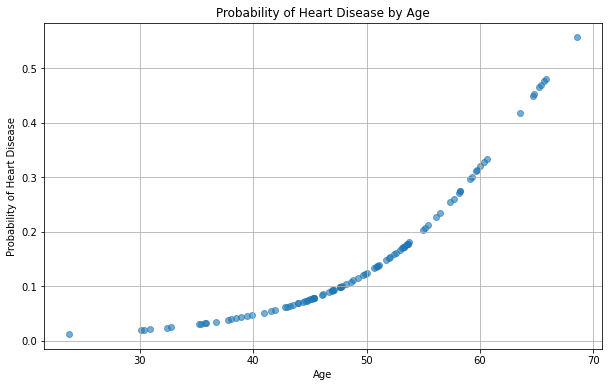

In [52]:
prior1 = sim.draws_pd()

results_df = pd.DataFrame({
    'age': data['age'],
    'heart_disease_prob': prior1.iloc[:, 9:].mean(axis=0) # Mean probability across samples
})

# Plotting the results with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(results_df['age'], results_df['heart_disease_prob'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease by Age')
plt.grid(True)
plt.show()

Prior 2 - trestbps (resting blood pressure)

In [72]:
np.random.seed(42)
bps = np.random.uniform(90, 180, 100)
heart_disease = np.random.binomial(1, 1 / (1 + np.exp(-0.05 * (bps - 120))))

data = {
    'N': len(bps),
    'bps': list(bps),
    'heart_disease': list(heart_disease)
}

model_age = CmdStanModel(stan_file='prior2.stan')
sim = model_age.sample(data=data,
                        iter_sampling=200,
                        iter_warmup=1000,
                        chains=4,
                        fixed_param=True,
                        seed=242522,)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [83]:
sim.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.00,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN
alpha,-0.16,0.630,0.9,-1.7,0.33,0.45,2.0,34.0,1.500000e+15
beta,-0.24,0.820,1.2,-1.7,0.54,1.20,2.0,34.0,1.600000e+15
heart_disease_prob[1],0.50,0.025,0.5,0.0,1.00,1.00,400.0,6667.0,1.424016e+69
heart_disease_prob[2],0.50,0.025,0.5,0.0,1.00,1.00,400.0,6667.0,1.089371e+92
...,...,...,...,...,...,...,...,...,...
heart_disease_prob[96],0.50,0.025,0.5,0.0,1.00,1.00,400.0,6667.0,5.649158e+73
heart_disease_prob[97],0.50,0.025,0.5,0.0,1.00,1.00,400.0,6667.0,4.809250e+74
heart_disease_prob[98],0.50,0.025,0.5,0.0,1.00,1.00,400.0,6667.0,1.558062e+71


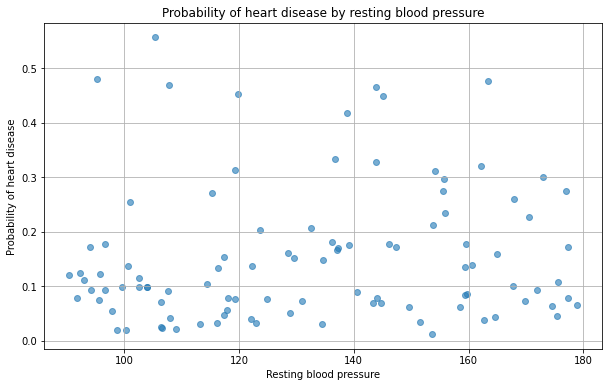

In [82]:
prior2 = sim.draws_pd()

results_df = pd.DataFrame({
    'bps': data['bps'],
    'heart_disease_prob': prior1.iloc[:, 9:].mean(axis=0)
})

plt.figure(figsize=(10, 6))
plt.scatter(results_df['bps'], results_df['heart_disease_prob'], alpha=0.6)
plt.xlabel('Resting blood pressure')
plt.ylabel('Probability of heart disease')
plt.title('Probability of heart disease by resting blood pressure')
plt.grid(True)
plt.show()

Prior 3 - thalach (maximum heart rate achieved)

In [56]:
np.random.seed(42)
thalach = np.random.uniform(70, 190, 100)
heart_disease = np.random.binomial(1, 1 / (1 + np.exp(-0.05 * (thalach - 120))))

data = {
    'N': len(bps),
    'thalach': list(thalach),
    'heart_disease': list(heart_disease)
}

model_age = CmdStanModel(stan_file='prior3.stan')
sim = model_age.sample(data=data,
                        iter_sampling=200,
                        iter_warmup=1000,
                        chains=4,
                        fixed_param=True,
                        seed=242522,)

INFO:cmdstanpy:compiling stan file /home/data-analytics-main/prior3.stan to exe file /home/data-analytics-main/prior3
INFO:cmdstanpy:compiled model executable: /home/data-analytics-main/prior3
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


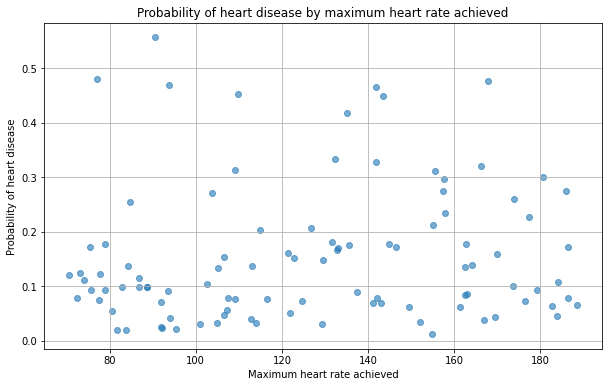

In [57]:
prior3 = sim.draws_pd()

results_df = pd.DataFrame({
    'thalach': data['thalach'],
    'heart_disease_prob': prior1.iloc[:, 9:].mean(axis=0)  # Mean probability across samples
})

# Plotting the results with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(results_df['thalach'], results_df['heart_disease_prob'], alpha=0.6)
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Probability of heart disease')
plt.title('Probability of heart disease by maximum heart rate achieved')
plt.grid(True)
plt.show()

## Posterior

In [94]:
data_pd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [96]:
predictors = data.drop(columns=['target'])
target = data['target']

# Standardize the predictors (optional but often recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

stan_data = {
    'N': predictors.shape[0],
    'K': predictors.shape[1],
    'X': predictors_scaled,
    'y': target.values
}

In [102]:

posterior_model = CmdStanModel(stan_file='posterior1.stan')

fit = posterior_model.sample(data=stan_data, iter_sampling=2000, chains=4)


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▋         | 00:00 Iteration:    1 / 3000 [  0%]  (Warmup)

chain 1 |█▉        | 00:00 Iteration:  400 / 3000 [ 13%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  800 / 3000 [ 26%]  (Warmup)





chain 1 |████▋     | 00:00 Iteration: 1200 / 3000 [ 40%]  (Sampling)


chain 1 |█████▉    | 00:00 Iteration: 1600 / 3000 [ 53%]  (Sampling)


chain 1 |███████▏  | 00:00 Iteration: 2000 / 3000 [ 66%]  (Sampling)


chain 1 |████████▍ | 00:00 Iteration: 2400 / 3000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


             Mean    MCSE  StdDev        5%      50%      95%     N_Eff  \
name                                                                      
lp__     -110.000  0.0490    2.70 -120.0000 -110.000 -110.000   3100.00   
beta[1]    -0.051  0.0022    0.21   -0.4000   -0.048    0.300   9590.00   
beta[2]    -0.820  0.0022    0.21   -1.2000   -0.820   -0.480   9510.00   
beta[3]     0.910  0.0019    0.19    0.6100    0.910    1.200   9436.00   
beta[4]    -0.350  0.0017    0.18   -0.6400   -0.350   -0.055  11478.00   
beta[5]    -0.230  0.0021    0.20   -0.5600   -0.230    0.092   8667.00   
beta[6]     0.016  0.0019    0.19   -0.2900    0.011    0.330  10256.00   
beta[7]     0.250  0.0016    0.18   -0.0580    0.250    0.550  12989.00   
beta[8]     0.550  0.0024    0.24    0.1700    0.540    0.940   9780.00   
beta[9]    -0.480  0.0018    0.19   -0.7900   -0.480   -0.170  11071.00   
beta[10]   -0.650  0.0025    0.24   -1.1000   -0.650   -0.250   9665.00   
beta[11]    0.360  0.0023

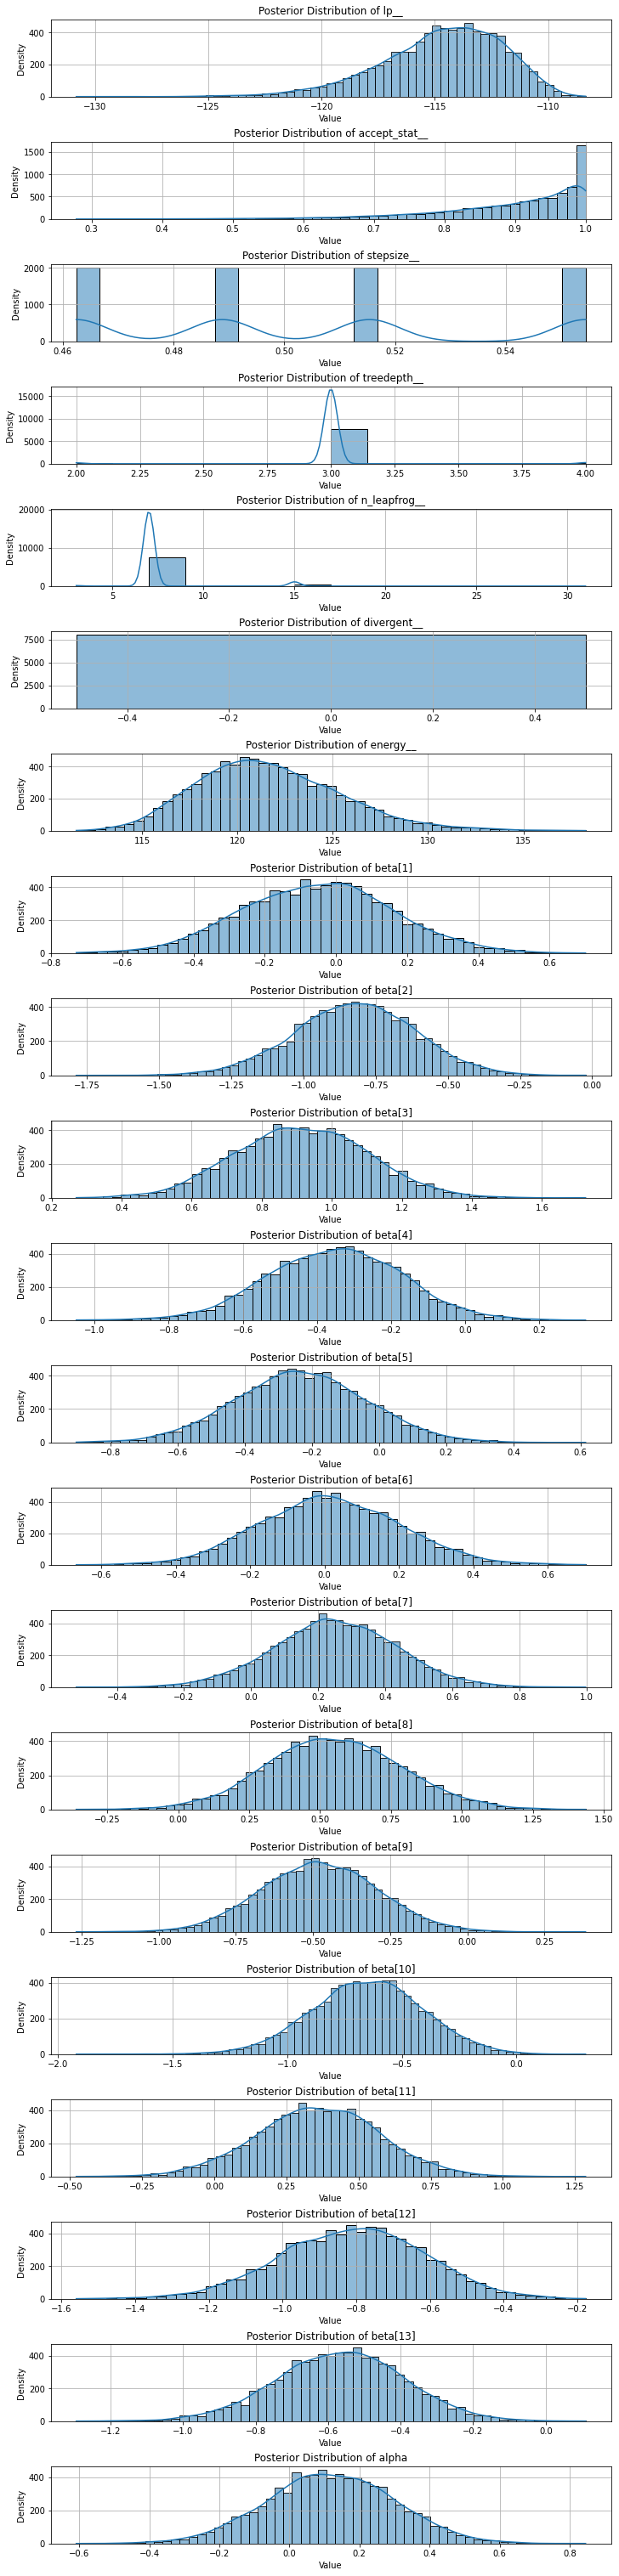

In [113]:
print(fit.summary())

results = fit.draws_pd()

num_params = results.shape[1]
fig, axes = plt.subplots(num_params, 1, figsize=(10, 2 * num_params), constrained_layout=True)


for i, column in enumerate(results.columns):
    sns.histplot(results[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Posterior Distribution of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

plt.show()
